#KNN

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *1*

**Title :** *KNN*

##**Aim :** *Implementation of the KNN algorithm*

---
###**Theory:**


KNN is one of the simple, yet highly powerful machine learning algorithms. It is used for classifying new data points according to the closest labeled examples in its feature space. The algorithm is non-parametric and intuitive and requires very minimal assumptions regarding the data distribution. Thus, it is quite versatile across applications.

**Major Themes:**

*KNN relies on "distance" to find the K (number of neighbors specified) nearest neighbors of a point.*

>**COMPUTE KNN: DISTANCE METRICS**
1. Euclidean distance (p=2): Measures the straight-line distance between two
= d(x,y)=∑i to n (xi - yi)^2
2. Manhattan distance (p=1): Calculates the sum of absolute differences between coordinates = d(x,y)=∑i to n|(xi - yi)|
3. Minkowski distance: A generalization of Euclidean and Manhattan distances, where  p is a parameter, d(x,y)=(∑i to n |xi - yi|^p)^1/p


To classify an unknown data point, the algorithm

This computes the distances from the point to all class-labeled observations.
It chooses K nearest neighbors.
Label the unknown point with the most frequent label among those of its neighbors.
In regression, KNN predicts values by averaging the labels of the k nearest points.

**Applications**

KNN is applied in recommendation systems, where it identifies items that are similar to those liked by the user. In healthcare, it helps diagnose diseases from analyzing symptoms that are similar to past cases. It applies to handwriting and image recognition as well.

**Other Important Fact:**

It's highly sensitive to the value chosen for K. With very small K, then prediction may become noisy, but with very large K it can dilute accuracy with far-off points in that case. It also uses a lot of computer with large datasets since there has to be recalculation of distances at every step of prediction. It therefore is well-suited only for smaller datasets and only when simplicity and interpretability are paramount. KNN is very easy to implement and highly adaptable-thus, it has to be said that simple approach can sometimes be quite incredible.

**Advantages of KNN:**

1. easy to implement
2. Adapts Easily
3. few Hyperparameters

**Disadvantages of KNN:**

1. Does not scale well
2. lazy Algo, it takes more memory and Data storage
3. Doesnot perform well with high dimensions
4. Prone to overfitting


---
**Platform :** *Google Colab*

###ALgorithm :
1. **Calculate Euclidean Distance:**
Let's initialize an empty list to store distances.
For each data point in the training set, calculate the Euclidean distance to the test point by computing the sum of the squares of the differences of all features and then taking their square root.
Append each of the calculated distances to the list of distances and return it as a DataFrame.
2. **Find nearest neighbors:**
Distance Data Frame Sorting to Ascending Order.
Select the first K rows of the sorted DataFrame to represent the nearest neighbors.
3. **Classify Using Majority Vote:**
Use the indices to index into the labels of the K nearest neighbors in the training set.
Count the frequency of all labels for all neighbours and predict the same one which holds most among their frequency.
4. **Full K-Nearest Neighbors KNN Prediction:**
Repeat for each test point: Steps 1–3 above to compute distances, select neighbors, and classify.
Append each classification result to a list of predictions and return it as final output for all test points.


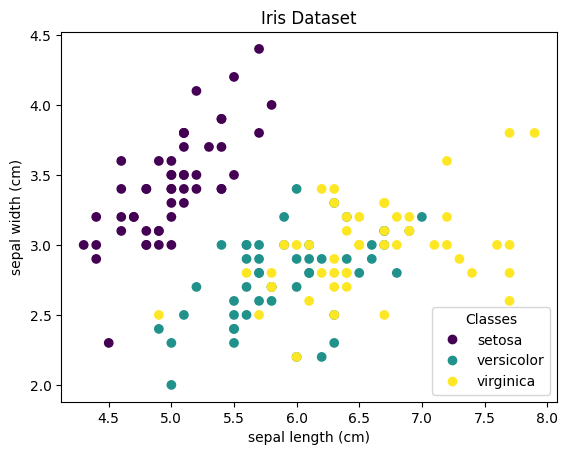

In [ ]:
#Data importing and preprcoessing
#loading the dataset
from sklearn import datasets
iris = datasets.load_iris()

#Scatter Plot of the Iris dataset
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.title("Iris Dataset")
plt.show()

In [ ]:
#MANUAL CODE

#Step1: Eulicdean distance
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row

          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

#Step 2: Finding the nearest neighbour
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

#Step 3 : Classify the point based on a majority vote
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

#Full Algorithm: Putting Everything Together
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred

In [ ]:
#Using API of sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

#making the df
iris_df = pd.DataFrame(datasets.load_iris()['data'], columns=datasets.load_iris()['feature_names'])
iris_df['target'] = datasets.load_iris()['target']

x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set


In [ ]:
#comaprsion between them

#Test the KNN from sractch(manual) Algorithm on the test dataset
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)

#Compare our implementation with Sklearn library
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)

#Calculate the Accuracy of  both methods
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667



#Naive Bayes

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *2*

**Title :** *Naive Bayes*

**Aim :** *Implementation of the Naive Bayes algorithm*

---
##Theory:

**Naive Bayes Algorithm:**
>It's a probabilistic classifier derived from Bayes' theorem, which relates the conditional probabilities. The 'naive' part was contributed by the strong independence assumption of features, by which each feature contributes evenly to the probability of an event occurrence. Although this can't be very realistic many of the times, these simplifications make Naive Bayes simple, very fast, and often amazingly effective.

**Key Concepts and Formula**

Bayes' theorem provides the core formula for the algorithm:

𝑃
(
𝑌
∣
𝑋
)
=
𝑃
(
𝑋
∣
𝑌
)
⋅
𝑃
(
𝑌
)/
𝑃
(
𝑋
)
 ,Where:

* 𝑃(𝑌∣𝑋) is the posterior probability of class  𝑌 given data 𝑋
* 𝑃(𝑋∣𝑌)is the likelihood of data 𝑋 given class 𝑌,
* 𝑃(𝑌) is the prior probability of class 𝑌,
* 𝑃(𝑋) is the prior probability of data 𝑋.

To classify, the algorithm computes the posterior probability for each class and assigns the label with the highest probability. For multiple features, Naive Bayes assumes feature independence, leading to the final formula:

𝑃(𝑌∣𝑋1,𝑋2,…,𝑋𝑛)=𝑃(𝑌)⋅∏𝑖 to 𝑛 𝑃(𝑋𝑖∣𝑌)

**Applications**

Naive Bayes is the best algorithm for text classification, which includes spam detection, sentiment analysis, and topic categorization. For instance, in spam detection, the words are treated as independent features, and the algorithm will calculate the likelihood of spam based on their frequency. Its efficiency allows it to handle large datasets with high-dimensional data.


**Types of Naive Bayes**

1. **Gaussian Naïve Bayes (GaussianNB):** This is a variant of the Naïve Bayes classifier, which is used with Gaussian distributions—i.e. normal distributions—and continuous variables.
2. **Multinomial Naïve Bayes (MultinomialNB):** This type of Naïve Bayes classifier assumes that the features are from multinomial distributions.
3. **Bernoulli Naïve Bayes (BernoulliNB):** This is another variant of the Naïve Bayes classifier, which is used with Boolean variables—that is, variables with two values, such as True and False or 1 and 0

**Advantages of Naive Bayes:**

1. Fast and efficient - It handles large datasets well.
2. Works with small data - Performs well even with limited data.
3. Simple to implement - Easy to code and understand.
4. Handles high-dimensional data - Excellent for text classification.

**Disadvantages of Naive Bayes:**

1. Assumes feature independence- May not be accurate.
2. Sensitive to zero probabilities - Requires smoothing techniques.
3. Limited interpretability - Doesn’t capture feature interactions.
4. Not suitable for big data sets - Challenges dependent features.

---
**Platform :** *Google Colab*

###Algorithm:

1. Class Initialization: Create an instance of the NaiveBayes class, which will hold necessary statistics for model training.

2. Fit the Model: In the fit method, calculate mean, variance, and prior probabilities for each class from the training data.

3. Make Predictions: Use the predict method to apply the trained model to the test dataset, making class label predictions for each sample:. Calculate Posterior Probabilities: In the _predict method, calculate the posterior probabilities for each class based on the likelihood of the features and the prior probabilities.

4. Probability Density Function Computation: The _pdf approach computes the Gaussian probability density for a features set versus the class under consideration using the mean and variance.

5. Output Predictions: Return the predicted class label array for the test set, which one can evaluate against the true labels.


In [ ]:
#DATA import and preprocessing


#loading the dataset
from sklearn import datasets
iris = datasets.load_iris()

#making the df
iris_df = pd.DataFrame(datasets.load_iris()['data'], columns=datasets.load_iris()['feature_names'])
iris_df['target'] = datasets.load_iris()['target']

In [ ]:
#MANUAL calculation

#manual implementation of naive bayes
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        X = X.to_numpy().astype(np.float64)
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

nb = NaiveBayes()
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)


In [ ]:
#using sklearn api

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


In [ ]:
# comparsion between the manual code and sklearn
from sklearn.metrics import accuracy_score


accuracy= accuracy_score(y_test, predictions)
print(f'The accuracy of our implementation is {accuracy}')
accuracy_sklearn= accuracy_score(y_test, y_pred)
print(f'The accuracy of sklearn implementation is {accuracy_sklearn}')

The accuracy of our implementation is 0.9466666666666667
The accuracy of sklearn implementation is 0.9466666666666667


#Decision Tree

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *3*

**Title :**Decision Tree**

**Aim :** *Implementation of the Decision Tree algorithm*

---
##Theory:

A decision tree is a non-parametric supervised learning algorithm. In fact, it has on outline that resembles a hierarchy and has a tree form structure with a root node, branches, Intermal nodes, and leaf nodes.

**Types of Decision Trees**

1. **CART (Classification and Regression Treers)** uses Gini Bidex(Classification) as metric.
2. **I03 (Iterative Dichotomiser 3)** uses Entropy function and Information gain as metrics

**Terminologies used:**

* **Root Nodes** - It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.

* **Decision Nodes** - are the nodes we get after aplitting the root nodes.

* **Leaf Nodes** - the nodes where further splitting is not possible are called leaf nodes or terminal nodes

* **Branch/Sub-tree** - just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-free.

* **Pruning**- is nothing but cutting down some nodes to stop overfitting.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes, Decision trees a nothing but a bunch of if-else statements in Bayman terms. & checks if the condition is true and if it is then it goes to the next node attached to that decision.

* **Entropy** is a metric to measure the impurity in a given attribute. It specifles randomness in data.
ID3 algorithm uses entropy to calculate the homogeneity of a sample.
>Η(Χ) = - Σ (Ρi * log2 Pi)
  
  Where:
X = Total number of samples Pi is the probability of class i




* **Gini index** is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.

>Gini = 1- summation (i = 1 to n) (Pi)^2,

where Pi is the probability of a particular element belonging to a specific class.

We want to determine which attribute in a given set of training feature vectors is most useful for discriminating between the classes to be learned.\orithm :

* **Information gain** tells us how important a given attribute of the feature vectors is.

---
**Platform :** *Google Colab*

In [ ]:
#data import and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("/content/drive/MyDrive/bill_authentication.csv")

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
#Manual calculation

import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, y_pred)
print(acc)

0.9854545454545455


In [ ]:
#using API

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 0)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(y_test.shape)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score (y_test, y_pred)
print('Accuracy is ' + str(accuracy))

(275,)
[[154   3]
 [  1 117]]
Accuracy is 0.9854545454545455


In [ ]:

# Calculate and print the accuracy of both methods (for Decision Tree)
print(f"Accuracy of manual Decision Tree: {acc}") # Assuming 'acc' is defined correctly in your manual implementation.
print(f"Accuracy of sklearn Decision Tree: {(accuracy)}") # Assuming 'accuracy' is defined correctly in your sklearn implementation.

Accuracy of manual Decision Tree: 0.9854545454545455
Accuracy of sklearn Decision Tree: 0.9854545454545455


[Text(0.5208333333333334, 0.9375, 'x[0] <= 0.274\nentropy = 0.992\nsamples = 1097\nvalue = [605, 492]'),
 Text(0.3125, 0.8125, 'x[1] <= 5.865\nentropy = 0.679\nsamples = 524\nvalue = [94, 430]'),
 Text(0.4166666666666667, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'x[2] <= 6.746\nentropy = 0.278\nsamples = 416\nvalue = [20, 396]'),
 Text(0.08333333333333333, 0.5625, 'x[0] <= -0.257\nentropy = 0.032\nsamples = 304\nvalue = [1, 303]'),
 Text(0.041666666666666664, 0.4375, 'entropy = 0.0\nsamples = 266\nvalue = [0, 266]'),
 Text(0.125, 0.4375, 'x[0] <= -0.248\nentropy = 0.176\nsamples = 38\nvalue = [1, 37]'),
 Text(0.08333333333333333, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.3125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.25, 0.5625, 'x[1] <= -4.8\nentropy = 0.657\nsamples = 112\nvalue = [19, 93]'),
 Text(0.20833333333333334, 0.4375, 'entropy = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(0.2916666666666667, 0.4375, 'entro

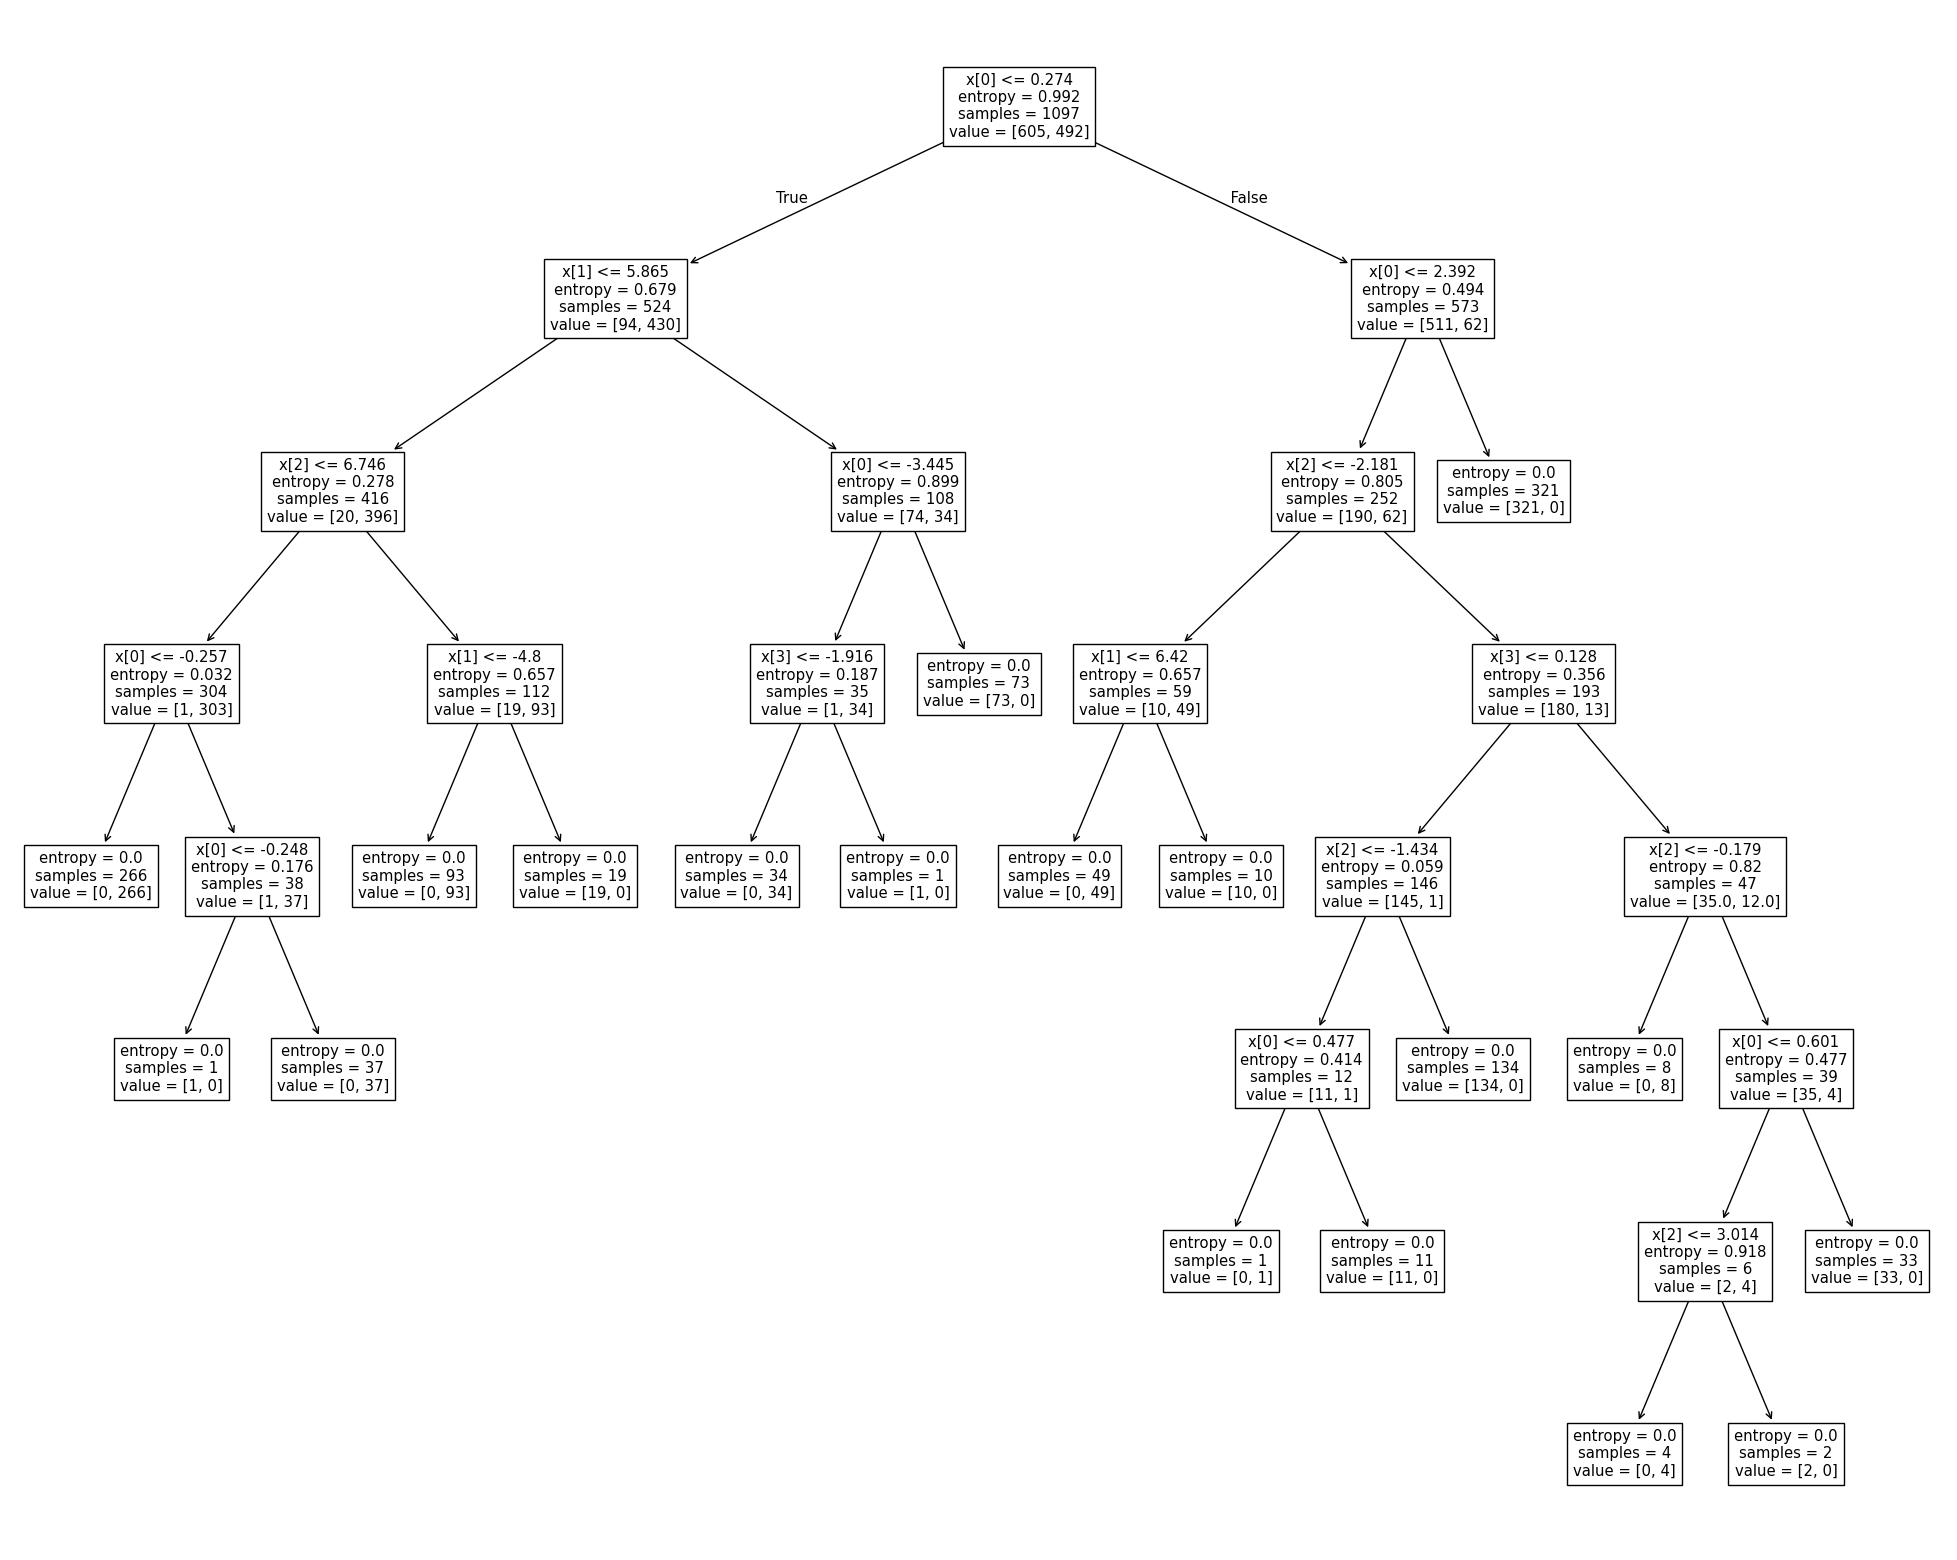

In [ ]:
from sklearn import tree

#plotting of decission tree classifier
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)

#Linear regression

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *4*

**Title :** *Linear regression*

**Aim :** *Implementation of the Linear regression algorithm*

---
##Theory:
Linear Regression is a very basic statistical method, which describes the relationship between a dependent variable and one or more independent variables. It assumes that the variables are linearly related. This means that a change in the independent variable(s) leads to a proportionate change in the dependent variable.

The goal of Linear Regression is to find the best-fitting line in the case of single variate and the best hyperplane in multiple regression such that the difference between the actually observed values and the expected values of the dependent variable is minimized. The resulting line is determined by the following equation:

 >y=b0+b1*x1+b2*x2.+bn*xn

where
* y: depends on the dependent variable,
* x1, x2,.xn  are independent variables
* b0 is an intercept, that is to say the value of y where all the x 's are zero
* b1, b2. bn are the coefficients -- in other words, those slope values of the respective independent variables.

The parameters (coefficients) are also determined using the method termed as Ordinary Least Squares. It reduces the residuals which are in the difference form between actual and predict to a sum of least square.

Linear Regression is a widely used method for forecasting, inference, and establishing a relationship between variables. It is a very easy yet powerful method with many different applications in fields such as economics, finance, or even machine learning.

**Assumptions of Linear Regression**

**Linearity**: The link between the dependent and the independent variable is linear.

**Independence**: The observations have to be independent of one another.

**Homoscedasticity**: The errors do not have a different variance across the levels of independent variables.

**Normality**: The errors are normally distributed.

---
**Platform :** *Google Colab*

**ALgorithm :**

Step1: Take one row and one column data

Step2: Calculate b and m on the basis of direct formula(OLS)

Text(0, 0.5, 'Package(in lpa)')

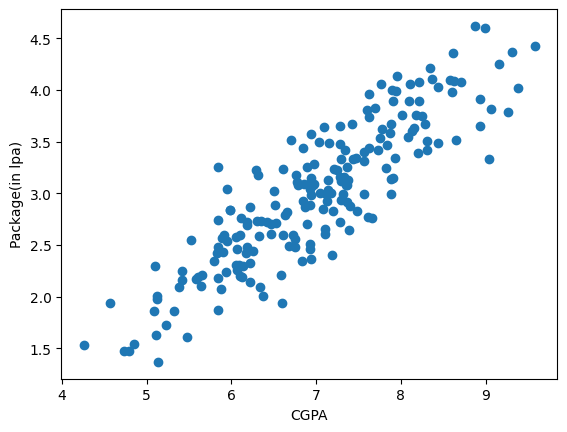

In [ ]:
#DATA import and Data preprcoessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/placement (1) (1).csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#plotting the data
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
#Manual calculation

class MeraLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):

        print(X_test)

        return self.m * X_test + self.b


#applying the manaul Function
lr = MeraLR()
lr.fit(X_train,y_train)
print(lr.predict(X_test[0]))

[0.55795197]
[-0.89611192]
[8.58]
[3.89111601]


In [ ]:
#calculation using the API
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

# Use array indexing instead of .iloc
lr.predict(X_test[0].reshape(1,1))

array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

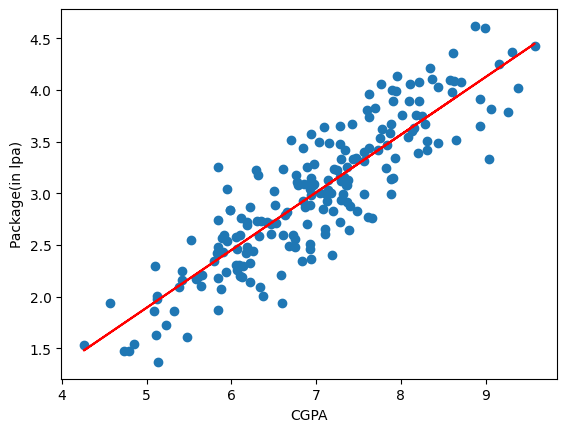

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
#comparsion between the MAnual and API
manual_r2 = 0.8  # Example value, replace with actual calculation
manual_mse = 10  # Example value, replace with actual calculation

# Using sklearn API
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
api_r2 = r2_score(y_test, y_pred)
api_mse = mean_squared_error(y_test, y_pred)


print(f"Manual Linear Regression R-squared: {manual_r2}")
print(f"Manual Linear Regression MSE: {manual_mse}")
print(f"API Linear Regression R-squared: {api_r2}")
print(f"API Linear Regression MSE: {api_mse}")

Manual Linear Regression R-squared: 0.8
Manual Linear Regression MSE: 10
API Linear Regression R-squared: 0.780730147510384
API Linear Regression MSE: 0.12129235313495527


#Multiple Regression

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *5*

**Title :** *Multiple Regression*

**Aim :** *Implementation of the Multiple Regression algorithm*

---
##Theory:

It is a statistical method for building a relationship of dependent variable with two or more independent variables. Unlike simple linear regression, the model considered here contains one or more independent variables. It presumes that changes in independent variables will create proportional variations in the dependent variable.

In other words, the Multiple Regression tries to find a hyperplane whose deviation of actual from the predicted value in a dependent variable is the smallest. A hyperplane for that equation has a special kind of form that represents:


**The Equation:**

The equation for Multiple Regression is similar to Linear Regression but with multiple independent variables:

> y = b0 + b1*x1 + b2*x2 +. + bn*xn

where;
* y-dependent variable, and x1, x2,.,xn  independent variables
* b0 is the intercept; that is, the value of y when all
values of x are 0
* b1, b2,., bn are the coefficients; that is, the slopes of the hyperplane for each independent variable


The coefficients are estimated by using an ordinary least squares (OLS) method that minimizes the sum of squared errors between the predicted and actual values.


This multiple regression technique has numerous uses in prediction, inference, and the general relationship among variables. In essence, it is an excellent powerful technique with significant use in economics, finance, and machine learning.

**Multiple Regression Assumptions**:

1. **Linearity**: The connection between the dependent and independent variables is linear.

2. **Independence**: All observations must be independent.

3. **Homoscedasticity**: All the independent variables at a uniform level must have equal errors variance.

4. **Normality**: The errors follow the normal distribution.

5. **No multicollinearity**: The independent variables are not related to each other.

---

**Platform :** *Google Colab*

**ALgorithm :**



Step1: Examining the data's correlation and direction

Step2: Fitting the line to the model

Step3: Assessing the model's validity and usefulness

In [ ]:
#Data import and Data preprocessing
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#Manual calculation

class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

lr = MeraLR()
lr.fit(X_train,y_train)

In [ ]:
# calculation using the sklearn API
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

In [ ]:
#comparsion between Manaul and API
from sklearn.metrics import mean_absolute_error

y_pred_manual = lr.predict(X_test)  # Assuming 'lr' is your manual linear regression model

manual_mae = mean_absolute_error(y_test, y_pred_manual)
manual_mse = mean_squared_error(y_test, y_pred_manual)
manual_r2 = r2_score(y_test, y_pred_manual)

import pandas as pd

data = {
    'Metric': ['MAE', 'MSE', 'R-squared'],
    'Manual': [manual_mae, manual_mse, manual_r2],
    'API': [api_mae, api_mse, api_r2]
}

df = pd.DataFrame(data)
df

,Metric,Manual,API
0,MAE,45.213034,45.213034
1,MSE,3094.456672,0.121292
2,R-squared,0.439934,0.780730


#Gradient Descent

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *6*

**Title :** *Gradient Descent*

**Aim :** *Implementation of the Gradient Descent algorithm*

#Theory:


**Gradient Descent** is the optimization algorithm where it continues to follow the direction for the maximum descent(reaching **local minima**) in order to minimize a function.\
 Mostly, machine learning algorithms use the gradient for loss function optimisation and the loss function evaluates the amount of difference between what something is being predicted and actuality.

**sklearn library** uses the concept of **Gradient Descent** to optimize the parameter of various machine learning models

Lets take example of LR:\
In Linear Regression, **Error = Σ(i=1 to n)[(y_i - ŷ_i)^2]**\
where ŷ_i = mx + b\
so if we take **Lose(m,b) = Σ(i=1 to n)[(y_i - mx - b)^2]**\
\
For **Lose(b) = b^2** we get

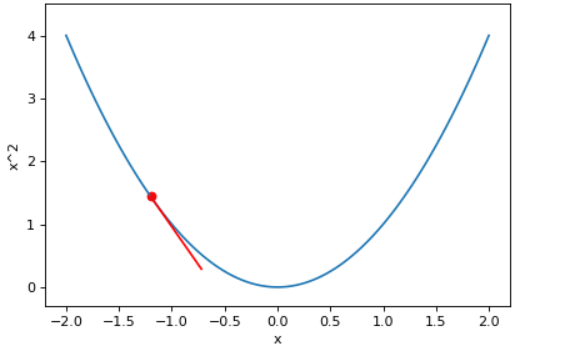

'b' on the left side, if value of **b increases, data point shifts towards left.**\
'b' on the right side, if value of **b decreases, data point shifts towards right.**\
\
**Slope** helps determine the direction in which points need to be moved.\
if **slope is Positive, b i.e., data point decrement, and if slope is negative, b i.e., data point increments.**\
\
Therefore, to determine the movement of data point, we get a formula, i.e.,\
**b(new) = b(old) - slope**



Due to continuous iteration of the above formula, the jump of data point look like the below graph:

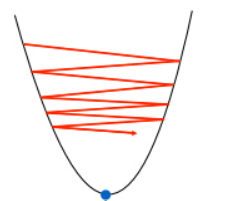

In order to control these jumps, a constant is add to the formula **b(new) = b(old) - slope**, which is, **α** (learning rate), so new formula becomes\
**b(new) = b(old) - learning rate(slope)**\

The value of learning rate decides the jump of the data point.

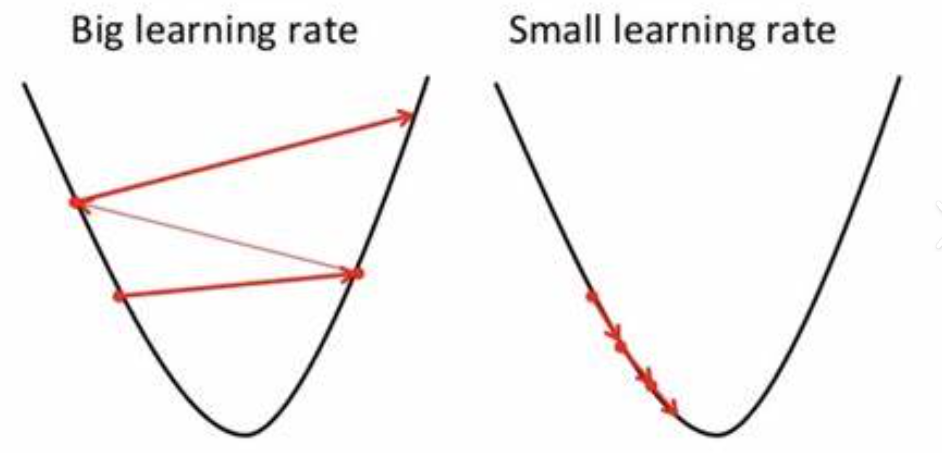

This term in the above formula,  learning rate(slope) is called **step size**.\
**Value of learning rate is taken vert small, in order to achieve the aim to reach the local minima**

# Types of Gradient Descent

There are **three types** of Gradient Descent:
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-batch Gradient Descent

###Batch Gradient Descent:


*   Calculate the gradient for all the training data in a single step.
*   Due to the undertaking of whole data for calculation, complexity increases and more memory is used, thus gets slow.



###Stochastic Gradient Descent:


*   SGD initialize the model's parameters with random values as well as sets the learning rate , and randomly select a training example from the dataset for specific number of iteration.
*   Choosing appropriate learning rate is crucial, also may take longer to converge.

###Mini-batch Gradient Descent:


*   Combines the advantage of SGD and Batch Gradient Descent.
*   It divides the training dataset into batchs, calculates the gradient and updates the model parameters for each batch.
*   It delivers computation and memory efficiency, improve convergence.

# Program

In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
X,y = make_regression(n_samples = 5, n_features = 1, noise = 10, n_informative=1, n_targets = 1)

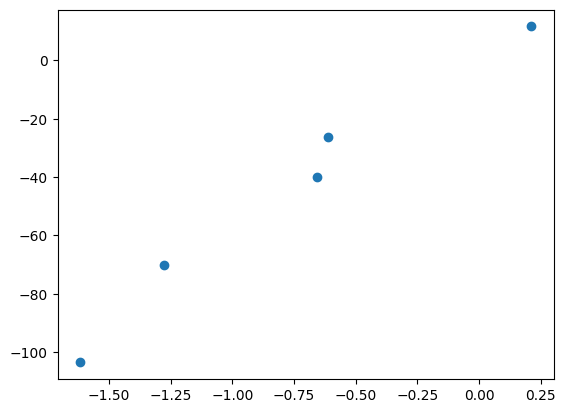

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.coef_

array([61.54980181])

In [ ]:
reg.intercept_

2.9786363827745603

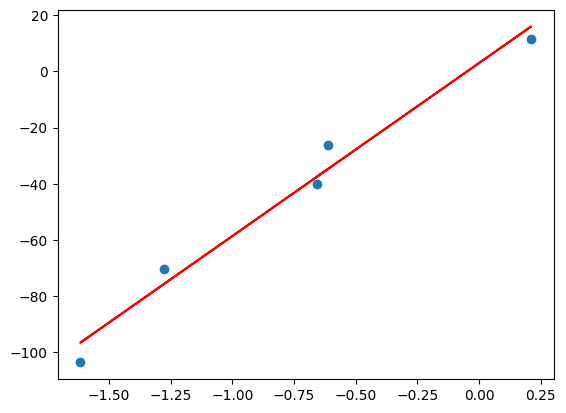

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [ ]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 100).reshape(5)

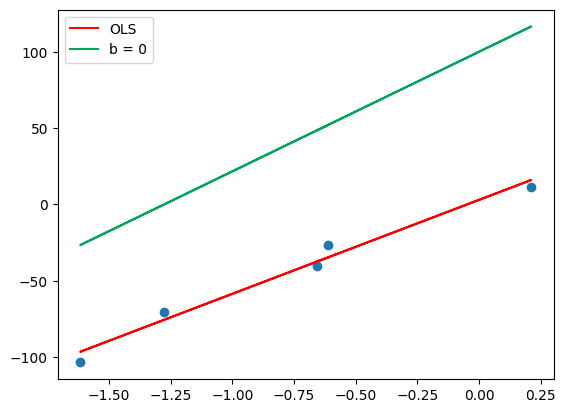

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [ ]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

837.3023273066306

In [ ]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

83.73023273066306

In [ ]:
# Calculating the new intercept
b = b - step_size
b

16.26976726933694

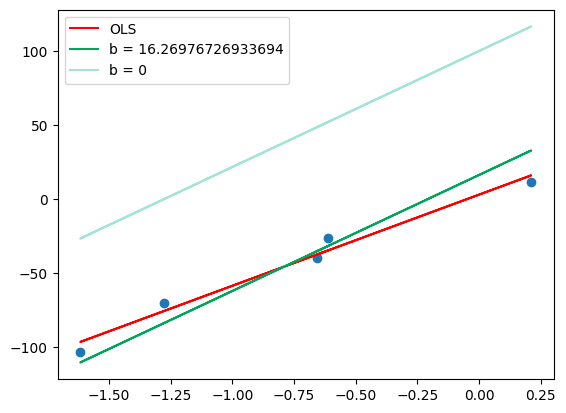

In [ ]:
y_pred1 = ((78.35 * X) + b).reshape(5)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [ ]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-2.842170943040401e-14

In [ ]:
step_size = loss_slope*lr
step_size

-2.842170943040401e-15

In [ ]:
b = b - step_size
b

16.269767269336942

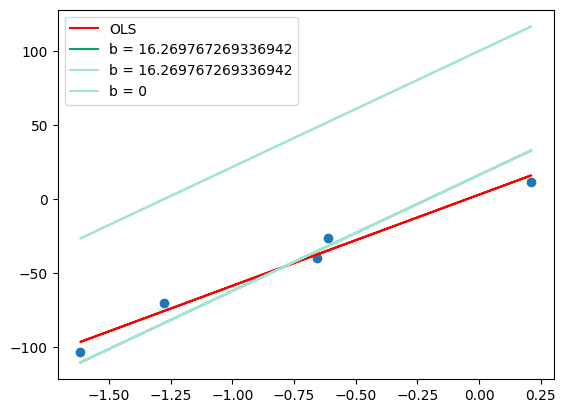

In [ ]:
y_pred2 = ((78.35 * X) + b).reshape(5)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [ ]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

7.105427357601002e-15

In [ ]:
step_size = loss_slope*lr
step_size

7.105427357601002e-16

In [ ]:
b = b - step_size
b

16.269767269336942

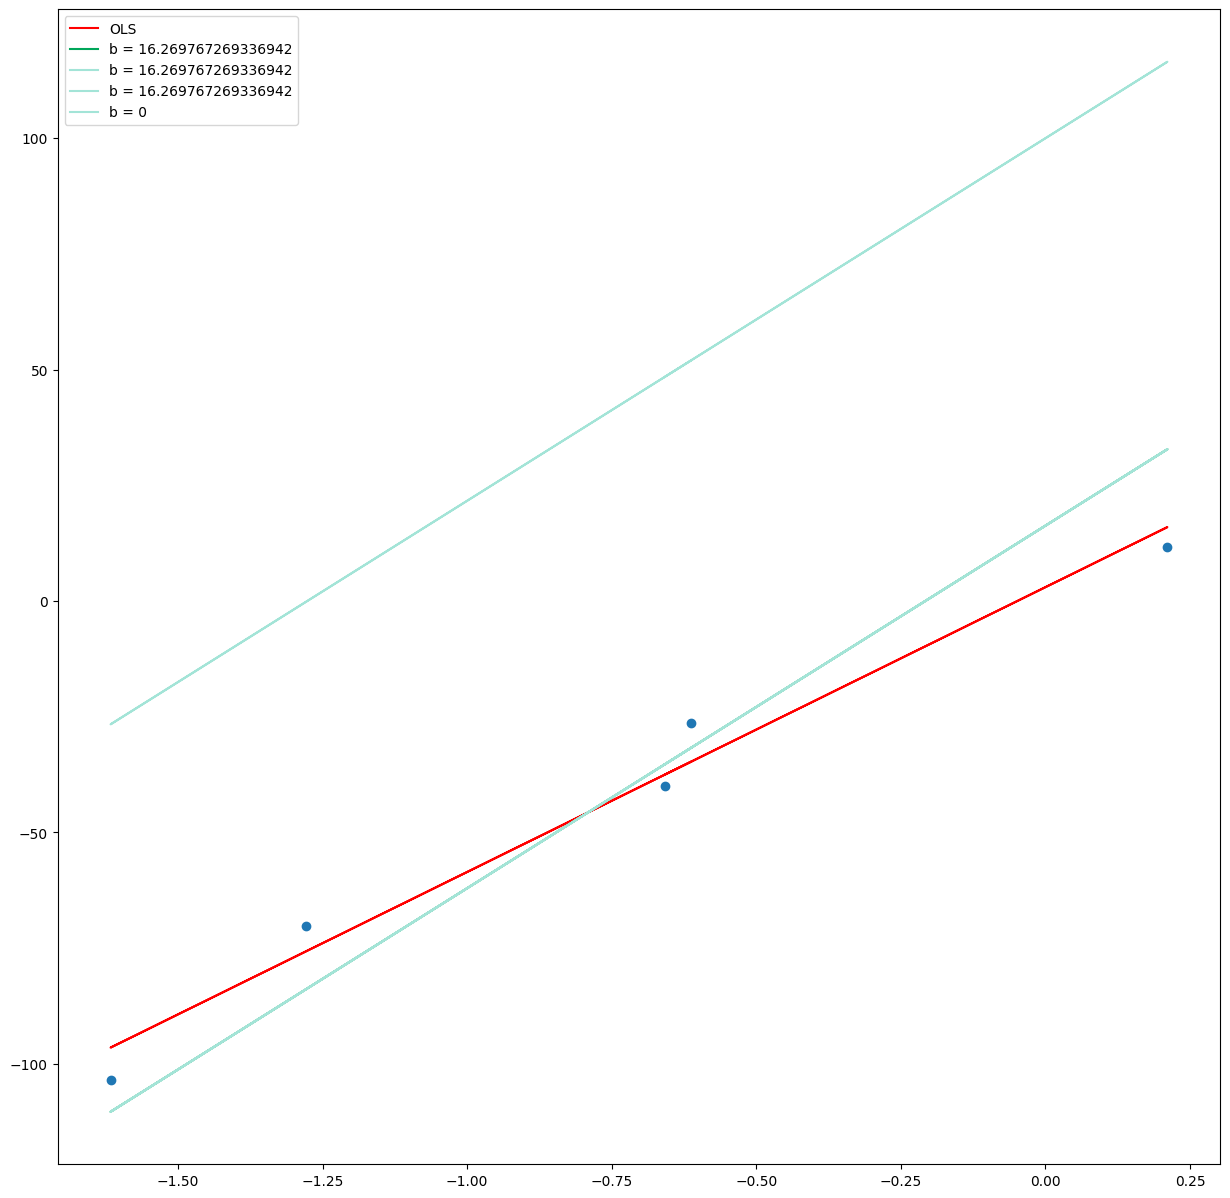

In [ ]:
y_pred3 = ((78.35 * X) + b).reshape(5)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

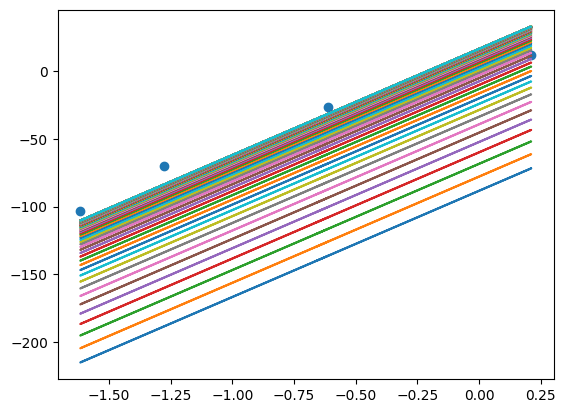

In [ ]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

# Gradient Descent 3D

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

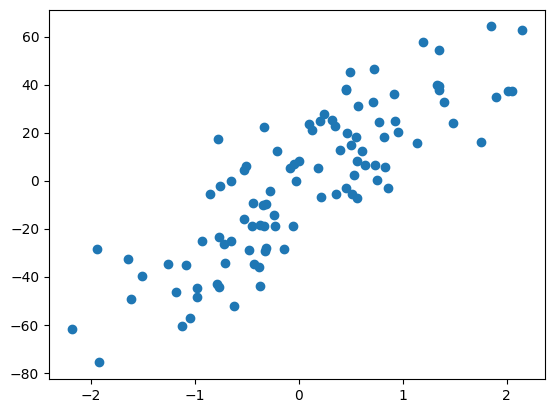

In [ ]:
plt.scatter(X,y)

In [ ]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)
final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T
z_arr = []
for i in range(final.shape[0]):
  z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))
z_arr = np.array(z_arr).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))



fig.show()

fig.write_html("cost_function.html")

##when the value of learning rate is big:

In [ ]:
b = 150
m = -127.82
lr = 0.010
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)

fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))

fig.show()

fig.write_html("cost_function2.html")

##When the value of leanring rate is small

In [ ]:
b = 150
m = -127.82
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)

fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))

fig.show()

fig.write_html("cost_function2.html")

#K- means
**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *7*

**Title :** *K- means*

**Aim :** *Implementation of the K- means algorithm*

---
##Theory:

**K-means Clustering** is an unsupervised learning algorithm commonly used to partition a dataset into distinct groups, called clusters, based on the similarity between data points. In K-means, each data point is assigned to one of \( K \) clusters, where \( K \) is a predefined number of clusters specified by the user.

The algorithm operates by minimizing the **sum of squared distances** between each data point and the centroid (center) of its assigned cluster. It begins by randomly initializing \( K \) cluster centroids, which serve as the initial center points. Each data point is then assigned to the nearest centroid based on the Euclidean distance. After every data point has been assigned to a cluster, the algorithm recalculates each cluster's centroid by averaging the data points within that cluster. These steps of assigning data points to clusters and recalculating centroids are repeated iteratively until the centroids stabilize and no longer change significantly, indicating convergence.

The main steps of the K-means algorithm are:
1. **Initialization**: Select \( K \) random initial centroids.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recompute the centroid of each cluster by averaging all points in that cluster.
4. **Repeat**: Continue the assignment and update steps until convergence.

Applications:

* K-means clustering is used in various domains, including:
* Customer segmentation
* Image compression
* Anomaly detection
* Document clustering

K-means clustering works well with datasets that have a spherical or well-separated structure. However, it has limitations: the final clusters can vary based on the initial centroids chosen, and the algorithm can sometimes converge to a local minimum rather than a global minimum.

K-means is widely used for tasks like customer segmentation, image compression, and anomaly detection, where it can efficiently group data into cohesive and interpretable clusters. Its simplicity and scalability make it a popular choice in data science and machine learning applications.

---

**Platform :** *Google Colab*

**ALgorithm :**

Step1: Assign or decide the value of 'K' cluster.

Step2: Initalizing the seed from eachnof the cluster.

Step3: Compute distances from all the points.

Step4: Assign new cluster according to min or max distances.

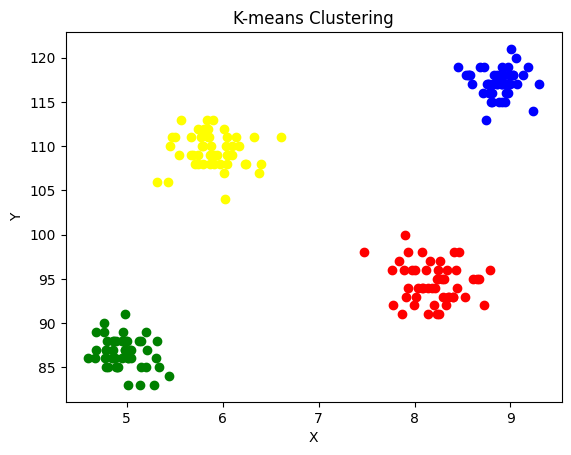

In [ ]:
#using the manual code
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

#centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
#cluster_std = [1,1,1,1]

#X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

#plt.scatter(X[:,0],X[:,1])

df = pd.read_csv('/content/drive/MyDrive/student_clustering.csv')

X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

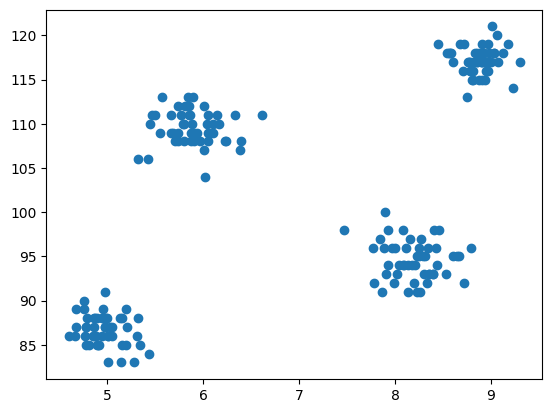

In [ ]:
#using the Sklearn API
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/student_clustering.csv')

plt.scatter(df['cgpa'],df['iq'])

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)



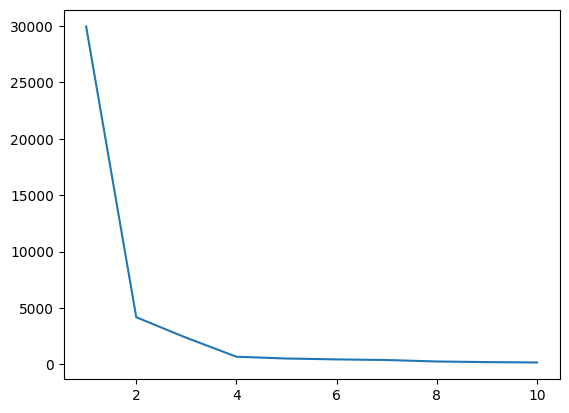

In [ ]:
plt.plot(range(1,11),wcss)

X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

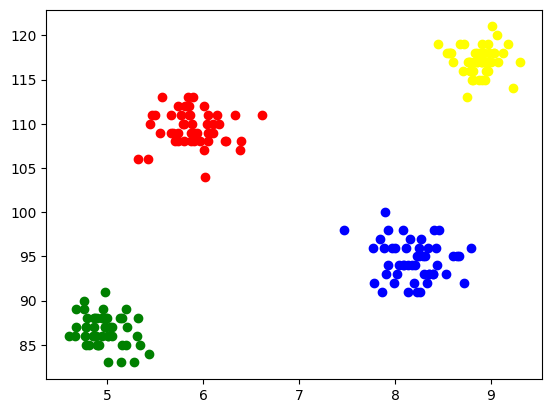

In [ ]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

#Polynomial Regression

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *8*

**Title :** *Polynomial Regression*

**Aim :** *Implementation of the Polynomial Regression algorithm*

---
#Theory:
**Theory on Polynomial Regression**

Polynomial Regression is a regression technique that models the relationship between a dependent variable and one or more independent variables using a polynomial function. It extends the concept of Linear Regression by allowing for curved relationships between the variables.

**Key Concepts**:

>**Polynomial Features**: Polynomial Regression involves transforming the original features into polynomial features by raising them to different powers. For example, if the original feature is x, polynomial features could include x^2, x^3, and so on.

>**Degree of Polynomial**: The degree of the polynomial determines the complexity of the model. A higher degree allows for more flexibility in fitting the data but can also lead to overfitting.

**Model Equation**: The general equation for Polynomial Regression is:

>y = b0 + b1*x + b2*x^2 + ... + bn*x^n

where:
* y is the dependent variable
* x is the independent variable
* b0, b1, b2, ..., bn are the coefficients
* n is the degree of the polynomial

**Advantages of Polynomial Regression**:

1. Can model non-linear relationships between variables.
2. Provides a good fit for a wide range of datasets.
3. Relatively easy to implement and interpret.


**Disadvantages of Polynomial Regression**:

1. Prone to overfitting if the degree of the polynomial is too high.
2. Sensitive to outliers.
3. May not perform well on datasets with complex relationships.

**Applications**:

Polynomial Regression is used in various scenarios where a linear model is insufficient to capture the relationship between variables, such as:
* Modeling growth curves
* Predicting stock prices
* Analyzing chemical reactions
* Fitting dose-response curves

---
**Platform :** *Google Colab*

**ALgorithm :**

Step 1: Import the required python packages.

Step 2: Load the dataset.

Step 3: Data analysis.

Step 4: Split the dataset into dependent/independent variables.

Step 5: Train the regression model.

Step 6: Predict the result.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [ ]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

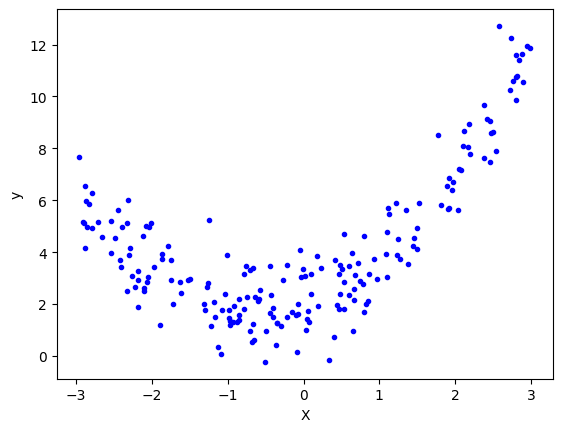

In [ ]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Applying linear regression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.015976120685262774

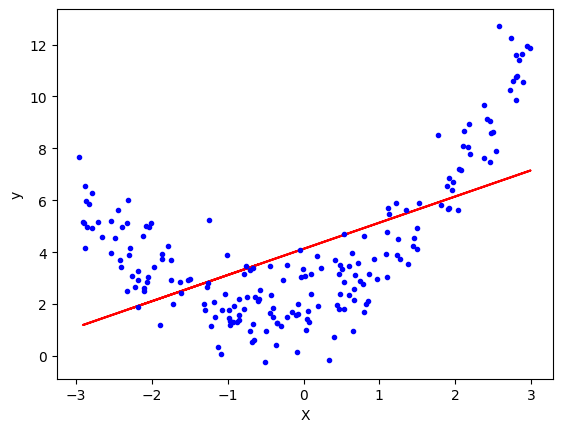

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
print(X_train[0])
print(X_train_trans[0])

[-2.28929339]
[ 1.         -2.28929339  5.24086425]


In [ ]:
# include_bias parameter

In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_trans)

In [ ]:
r2_score(y_test,y_pred)

0.8715501302442468

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.93840702 0.75383492]]
[2.08309668]


In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

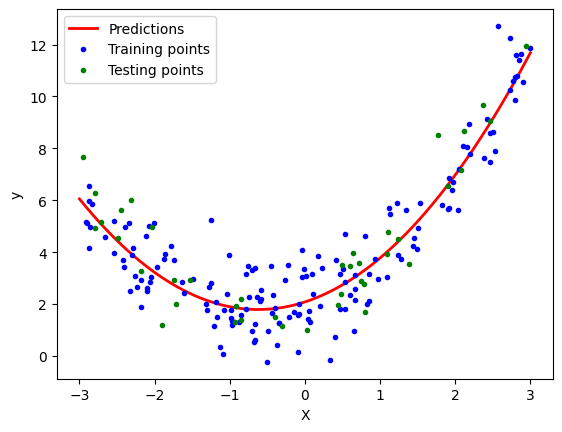

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

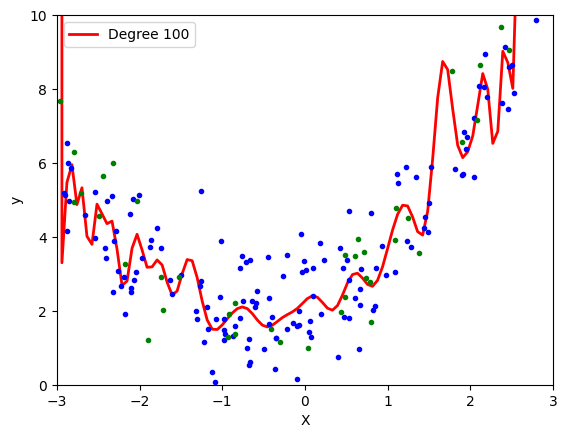

In [ ]:
polynomial_regression(100)

In [ ]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



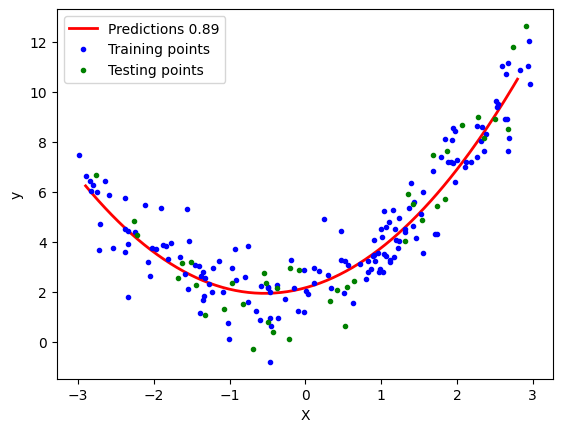

In [ ]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)



In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__) # Check version

poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

print("Input",poly.n_features_in_) # add underscore "_" at the end of n_features_in
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

1.3.2
Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12 

In [ ]:
X_multi_trans.shape

(100, 496)

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_test_multi = poly.transform(final)

In [ ]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

#PCA
**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *9*

**Title :** *PCA*

**Aim :** *Implementation of the PCA algorithm*

**Platform :** *Google Colab*


# Thoery (Curse of Dimensionality)

**Feature engineering** is a crucial part of **Machine Learning Life Cycle**.
Feature engineering stands for, using domain knowlege to extract feature from raw data to improve ML algorithm performance.

Feature Engineering includes following parts:
* Feature transformation
* Feature construction
* Feature selection
* Feature extraction

The **Curse of Dimensionality** refers to the challenges and issue that arise when working with high-dimensional data. As the number of features in dataset incresases, the data become sparse, and models may struggle to find meaningful patterns.

To address the Curse of Dimensionality, **Feature Selection** and **Dimensionality Reduction** are used.

**PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis)** are dimensionality reduction techiques.

#Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a popular dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space.\
\
PCA is used in unsupervised machine learning problem. Though it is a complex technique but reliable.\
\
For example, changing 2D data to 1D **without loosing property of original data**.\
\
PCA makes ML algo faster execution and helps to visualize the data in a better way.

### Steps to apply PCA:
1. **Standardization**:
   * The dataset is standardized make all features are on the same scale, usually calculate mean.
2. **Calculation of Covariance Matrix**:
   * For sample : cov(X) = 1/(n-1)[X^T.X]
   * For population : cov(X) = 1/(n) [X^T.X]
3. **Calculation of Eigenvalues and Eigenvectors**
4. **Select Principal Components**:
   * Choose the top K components (those with the highest eigenvalues) to retain the most important variance.
5. **Transform the data**:
   * The original data is projected onto the new axes formed by the selected principal components.


#Implementing PCA :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

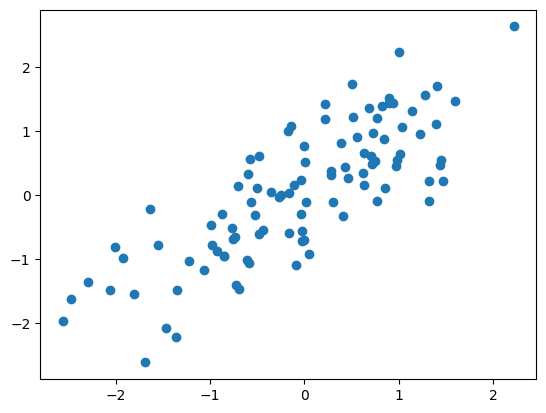

In [ ]:
#step 1: Generating 2D data
np.random.seed(0)
mean = [0,0]
cov = [[1, 0.8], [0.8, 1]]
data = np.random.multivariate_normal(mean, cov, 100)
plt.scatter(data[:,0], data[:,1])
plt.show

In [ ]:
# Step 2: standardize the dataset
data_mean = np.mean(data,axis=0)
data_centered = data - data_mean

In [ ]:
# step 3: compute the covariance matrix
con_matrix = np.cov(data_centered.T)
print(con_matrix)

[[1.03857986 0.84522228]
 [0.84522228 1.06878628]]


In [ ]:
#step4 : calculate eignvalue and eignvectors
eignvalues, eignvectors = np.linalg.eig(con_matrix)
print(eignvalues)
print(eignvectors)

[0.20832587 1.89904028]
[[-0.71339543 -0.7007617 ]
 [ 0.7007617  -0.71339543]]


In [ ]:
# step 5 : sort eignvalues and eignvector
sorted_indices = np.argsort(eignvalues)[::-1] # sort in desecending oreder
sorted_eignvalues = eignvalues[sorted_indices]
sorted_eignvectors = eignvectors[:,sorted_indices]
print(sorted_eignvalues)
print(sorted_eignvectors)

[1.89904028 0.20832587]
[[-0.7007617  -0.71339543]
 [-0.71339543  0.7007617 ]]


In [ ]:
#step 6: choose the top K eignvector(1D)
K=1
top_k_eignvectors = sorted_eignvectors[:,:K]
print(top_k_eignvectors)

[[-0.7007617 ]
 [-0.71339543]]


In [ ]:
# step 7: project the data onto PC
data_1d = np.dot(data_centered, top_k_eignvectors)


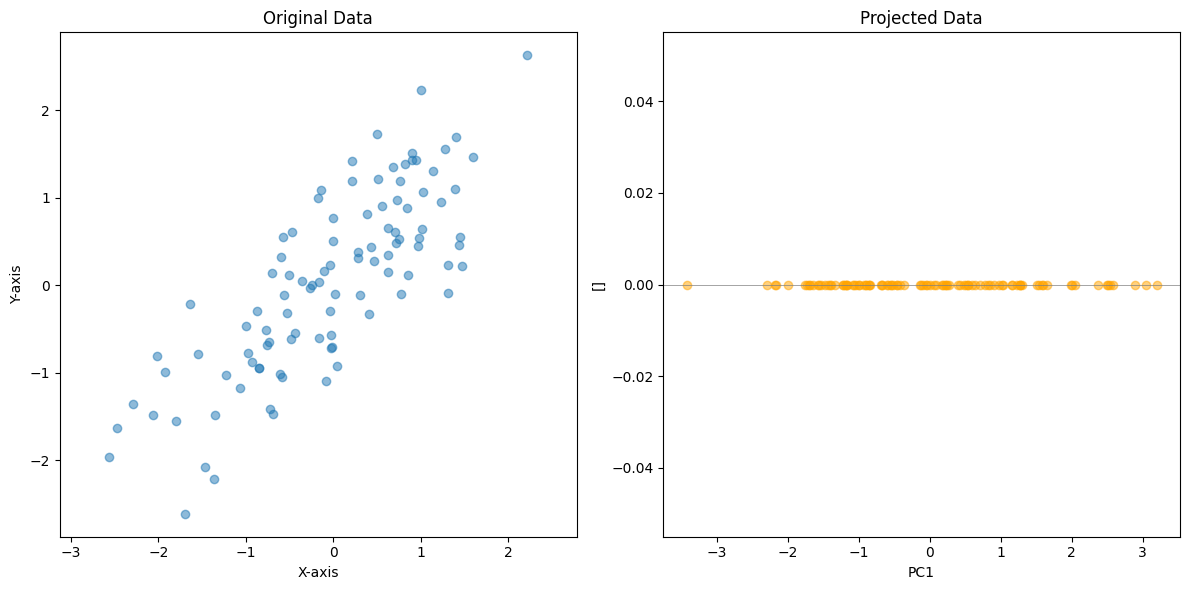

In [ ]:
# step 8 : Plot the original data and projection
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1],alpha=0.5)
plt.title('Original Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(data_1d[:,0], np.zeros_like(data_1d[:,0]), alpha=0.5,color='orange')
plt.title('Projected Data')
plt.xlabel('PC1')
plt.ylabel([])
plt.axhline(0, color= 'gray', lw=0.5)

plt.tight_layout()
plt.show()


#LDA
**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *10*

**Title :** *LDA*

**Aim :** *Implementation of the LDA algorithm*


**Platform :** *Google Colab*



# Theory (Linear Discriminant Analysis)

Linear Discriminant Analysis (LDA) is a **supervised  machine leanring and statistics algorithm** of dimensionality reduction and classification.\
\
LDA projects high-dimensional data in lower-dimensional space, that maximize the separability between multiple classes.\
\
**Unlike PCA, it is not concerned with retaining the variance in the data set but class discrimination.**

LDA find a linear combination of features that best separates the different classes. It proceeds to do so by finding directions, also known as linear discriminants through which  data points of different classes are most spread apart.

####  Steps involved in LDA:
1. Compute the class-wise means:
    * For each class, compute the mean of all data points. Compute between class scatter matrix S.
2. Calculate the between-class scatter matrix  S_B:
    * S_B measures the separation between the class means and the overall mean.

3. Calculate the within-class scatter matrix S_W:
    * S_W measujres the variance within each class.
4. Find the eigenvalues and eigenvectors:
    * These determine the directions (linear discriminants) that maximize class separability.
5. Project the data:
    * Data is projected onto the new linear discriminant axes to reduce dimensionality and aid classification.


In [ ]:
import numpy as np

def lda_2d_to_1d(X, y):

    # Step 1: Compute the mean vectors for each class
    class_labels = np.unique(y)
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y == cl], axis=0))

    # Step 2: Compute the within-class scatter matrix SW
    SW = np.zeros((X.shape[1], X.shape[1])) # Initialize the within-class scatter matrix SW as a zero matrix of size (number of features) x (number of features)
    for cl, mean_vec in zip(class_labels, mean_vectors):
        class_scatter = np.zeros((X.shape[1], X.shape[1]))  # scatter matrix for every class
        for row in X[y == cl]:
            row, mean_vec = row.reshape(2, 1), mean_vec.reshape(2, 1)
            class_scatter += (row - mean_vec).dot((row - mean_vec).T)
        SW += class_scatter

    # Step 3: Compute the between-class scatter matrix SB
    overall_mean = np.mean(X, axis=0).reshape(2, 1)
    SB = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == class_labels[i]].shape[0]
        mean_vec = mean_vec.reshape(2, 1)  # make it a column vector
        SB += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

    # Step 4: Solve the generalized eigenvalue problem for the matrix inv(SW) * SB
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

    # Step 5: Sort eigenvectors by eigenvalues in descending order
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

    # Step 6: Select the top eigenvector (since we want to reduce to 1D)
    W = eig_pairs[0][1].reshape(2, 1)

    # Step 7: Transform the data to 1D
    X_lda = X.dot(W)

    return X_lda

# Example usage
# Assume we have a 2D dataset with two classes (y=0, y=1)
X = np.array([[2, 3], [3, 4], [4, 5], [5, 6], [5, 8], [6, 7], [7, 8], [8, 9]])  # 2D data
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Class labels

# Perform LDA
X_lda = lda_2d_to_1d(X, y)
print("Transformed 1D data:\n", X_lda)

Transformed 1D data:
 [[-2.42535625]
 [-3.15296313]
 [-3.88057   ]
 [-4.60817688]
 [-6.54846188]
 [-5.33578375]
 [-6.06339063]
 [-6.7909975 ]]


In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Example 2D dataset
X = np.array([[2, 3], [3, 4], [4, 5], [5, 6], [5, 8], [6, 7], [7, 8], [8, 9]])  # 2D data
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Class labels

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the model and transform the data to 1D
X_lda = lda.fit(X, y).transform(X)

print("Transformed 1D data:\n", X_lda)

Transformed 1D data:
 [[-3.01511345]
 [-2.11057941]
 [-1.20604538]
 [-0.30151134]
 [ 2.11057941]
 [ 0.60302269]
 [ 1.50755672]
 [ 2.41209076]]


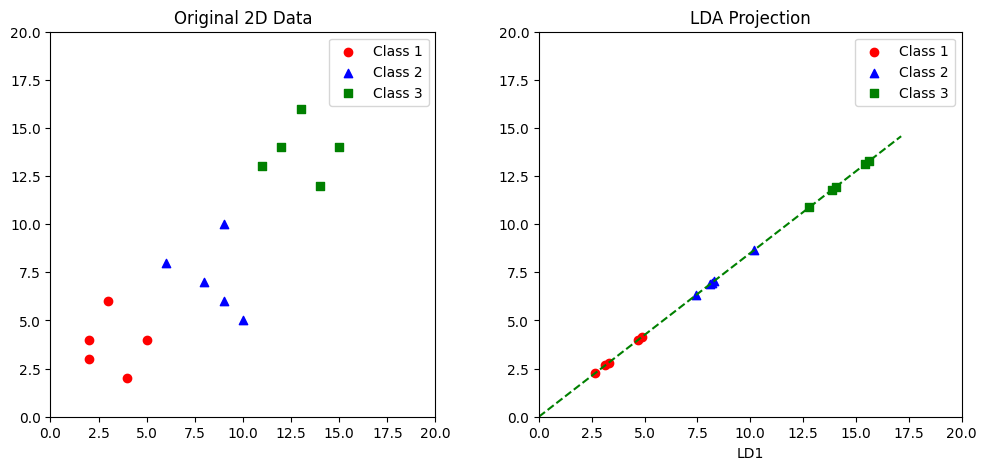

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for three classes
data_class1 = np.array([[4, 2], [2, 4], [2, 3], [3, 6], [5, 4]])
data_class2 = np.array([[9, 10], [6, 8], [9, 6], [8, 7], [10, 5]])
data_class3 = np.array([[14, 12], [12, 14], [11, 13], [13, 16], [15, 14]])

# Scatter plot of the three classes (Original Data)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='red', marker='o', label='Class 1')
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='blue', marker='^', label='Class 2')
plt.scatter(data_class3[:, 0], data_class3[:, 1], color ='green', marker='s', label='Class 3')
plt.title('Original 2D Data')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

# Class means
class_mean1 = np.mean(data_class1, axis=0)
class_mean2 = np.mean(data_class2, axis=0)
class_mean3 = np.mean(data_class3, axis=0)

# Covariance matrices
cov_matrix1 = np.cov(data_class1, rowvar=False)
cov_matrix2 = np.cov(data_class2, rowvar=False)
cov_matrix3 = np.cov(data_class3, rowvar=False)

# Within-class scatter matrix
within_class_scatter = cov_matrix1 + cov_matrix2 + cov_matrix3

# Between-class scatter matrix
between_class_scatter = np.outer((class_mean1 - class_mean2), (class_mean1 - class_mean2)) + np.outer((class_mean1 - class_mean3), (class_mean1 - class_mean3)) + np.outer((class_mean2 - class_mean3), (class_mean2 - class_mean3))

# Compute LDA projection
inv_within_class_by_between_class = np.dot(np.linalg.inv(within_class_scatter), between_class_scatter)

# Get projection vectors
eigenvalues, eigenvectors = np.linalg.eig(inv_within_class_by_between_class)

# First projection vector
projection_vector = eigenvectors[:, 0]

# Project data to 1D
projected_data1 = np.dot(data_class1, projection_vector)
projected_data2 = np.dot(data_class2, projection_vector)
projected_data3 = np.dot(data_class3, projection_vector)

# Plot the projected data in the original 2D space showing projection direction
theta = np.arctan2(projection_vector[1], projection_vector[0])
projected_data1x, projected_data1y = np.multiply(np.cos(theta), projected_data1), np.multiply(np.sin(theta), projected_data1)
projected_data2x, projected_data2y = np.multiply(np.cos(theta), projected_data2), np.multiply(np.sin(theta), projected_data2)
projected_data3x, projected_data3y = np.multiply(np.cos(theta), projected_data3), np.multiply(np.sin(theta), projected_data3)
max_projection = max([max(projected_data1), max(projected_data2), max(projected_data3)])
arrow_endx, arrow_endy = np.multiply(np.cos(theta), max_projection + 2), np.multiply(np.sin(theta), max_projection + 2)

plt.subplot(1, 2, 2)
plt.plot([0, arrow_endx], [0, arrow_endy], 'g--')
plt.scatter(projected_data1x, projected_data1y, color='red', marker='o', label='Class 1')
plt.scatter(projected_data2x, projected_data2y, color='blue', marker='^', label='Class 2')
plt.scatter(projected_data3x, projected_data3y, color='green', marker='s', label='Class 3')
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.legend()
plt.show()

#Logictic Regression
**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *11*

**Title :** *Logictic Regression*

**Aim :** *Implementation of the Logictic Regression algorithm*

---
##Theory:
Logistic regression is a statistical method used for binary classification, where the goal is to predict the probability of a data point belonging to one of two classes. Despite its name, it's not a regression algorithm but a classification algorithm. It employs a logistic function to model the relationship between the independent variables and the probability of the dependent variable belonging to a specific class.

The core of logistic regression lies in the sigmoid function, which maps any real-valued input to a probability value between 0 and 1. This probability represents the likelihood of the data point belonging to the positive class. The logistic regression model learns the coefficients of the independent variables that best fit the training data, allowing it to predict the probability for new data points.

The model's output is a probability score, which can be thresholded to make a binary classification decision. Typically, a threshold of 0.5 is used, where probabilities above 0.5 are classified as the positive class, and probabilities below 0.5 are classified as the negative class.

**Benefits of Logistic Regression:**

* **Simplicity and interpretability**: Logistic regression is relatively simple to understand and interpret, making it a popular choice for classification tasks.
* **Probability estimates**: It provides probability estimates for each prediction, allowing for a more nuanced understanding of the model's confidence.
* **Feature importance**: The coefficients of the independent variables can be used to assess their relative importance in the classification process.
* **Efficiency**: Logistic regression is computationally efficient, especially for datasets with a large number of features.


**Applications of Logistic Regression:**

* **Spam detection**: Identifying spam emails based on their content.
* **Credit risk assessment**: Predicting the likelihood of loan default based on applicant information.
* **Medical diagnosis**: Classifying patients based on their symptoms and medical history.
* **Image recognition**: Recognizing objects in images based on their features.
* **Platform :** *Google Colab*

---
**ALgorithm :**

Step 1: Sigmoid Function. At the core of Logistic Regression lies the Sigmoid Function, also known as the Logistic Function.

Step 2: Hypothesis Function.

Step 3: Cost Function.

Step 4: Gradient Descent.

Step 5: Decision Boundary.

In [ ]:
#manual function
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression1():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = LogisticRegression1(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

<ipython-input-157-98eda92f58b5>:4: RuntimeWarning:

overflow encountered in exp



0.9210526315789473


In [ ]:
#using the sklearn API
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.61%


In [ ]:

from sklearn.metrics import accuracy_score

# Evaluate the sklearn model
y_pred_sklearn = model.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Sklearn Accuracy: {:.2f}%".format(accuracy_sklearn * 100))

# Evaluate your manual model (already present in the code)
print("Manual Implementation Accuracy: {:.2f}%".format(acc * 100))



Sklearn Accuracy: 95.61%
Manual Implementation Accuracy: 92.11%


#DBSCAN

**Name :** *Pushkar Sharma*

**Roll no :** *2312res482*

**Experiment No. :** *12*

**Title :** *DBSCAN*

**Aim :** *Implementation of the DBSCAN algorithm*

---
##Theory:

DBSCAN stands for "Density-Based Spatial Clustering of Applications with Noise," meaning that this algorithm groups objects by the density in space using a set of spatial features and thus, due to it being unsupervised clustering, there is not necessarily any foreseen number of clusters before processing the file.

On the other hand, with K-means there has to be the same predefined as one cannot tell with any other approach the exact clusters before grouping data. Because it allows identifying clusters having any possible shapes, an essentiall tool when working on complicated files, it actually is.

###Working of DBSCAN

>DBSCAN relies on two key parameters:
1. Epsilon (s): The radius within which points are considered neighbors.
2. MinPts: The minimum number of points required to form a dense region (cluster).

###Main Concepts:

**Core Point:** A point that has at least MinPts neighbors (including itself) within the e-radius.

**Border Point:** A point that lies within the e-radius of a core point but does not have enough neighbors to be a core point itself.

**Noise Point:** A point that is neither a core point nor reachable from any core point (Le., an outber).


---
**Platform :** *Google Colab*

**ALgorithm :**

1. Start with an unvisited point. If the point is a core point, a new cluster is formed

2. Expand the cluster: Include all points within the radius of the core point. If any of these neighbors are also core points, the cluster grows further by including their neighbors.

3. Handle border points and noise. Border points are added to the nearest cluster, while noise points remain unclustered.

4. Repeat until all points are visited

In [ ]:
#manual code
class Point:
    def __init__(self, coordinates, type, neighboringPoints, cluster):
        self.coordinates = coordinates
        self.type = type #1 for core point, 2 for border point, 3 for outlier
        self.neighboringPoints = neighboringPoints
        self.cluster = cluster #1, 2, 3, ... when it has been assigned to a cluster

def EuclDist(x, p, eps, MinPts):
    NeighboringPoints = []
    type = 0
    for j in range(len(x)):
        point = x[j]
        dist = 0
        for i in range(len(point)):
            dist = dist + (point[i] - p[i])**2
        dist = dist**(1/2)
        if (dist < eps):
            NeighboringPoints.append(j)
    if (len(NeighboringPoints) > MinPts):
        type = 1 #core point
    elif (len(NeighboringPoints) > 1):
        type = 2 #border point
    else:
        type = 3 #outlier
    return [NeighboringPoints, type]

def DBscan(x, eps, MinPts): #x is a numpy array of lists. The list contains the coordinates of the datapoints.
    currentCluster = 0
    points = []
    for data in x: #Step 1: Initialize points as core, border, or outlier points; O(n^2)
        [NeighboringPoints, type] = EuclDist(x, data, eps, MinPts)
        points.append(Point(data, type, NeighboringPoints, 1 - type))
    for i in range(len(x)): #Loop through all datapoints
        if points[i].cluster == 0: #if a point is a core point and it has not been clustered yet
                                   #Since there are log(n) clusters, you encounter an unclustered core point log(n) times
            currentCluster = currentCluster + 1
            points[i].cluster = currentCluster
            findClusterPoints(x, currentCluster, points, i, eps, MinPts)
    return points

def findClusterPoints(x, currentCluster, points, position, eps, MinPts): #Step 2b; [log(n/log(n))]^[log(n/log(n))]
    ClusterMembers = points[position].neighboringPoints
    i = 0
    while (i < len(ClusterMembers)):
        expansionPoint = ClusterMembers[i] #set an expansion point
        if (points[expansionPoint].cluster == -1): #if it's a border point that has NOT been assigned to a cluster
            points[expansionPoint].cluster = currentCluster
        elif (points[expansionPoint].cluster == 0): #if it's a core point that has NOT been assigned to a cluster
            points[expansionPoint].cluster = currentCluster
            ClusterMembers = ClusterMembers + points[expansionPoint].neighboringPoints
        i = i + 1

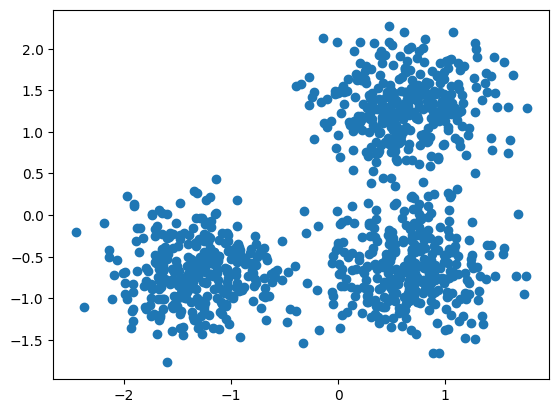

In [ ]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1])

In [ ]:
points = DBscan(X, eps = 0.2, MinPts = 5)
#points[i].type = Point i's type
#points[i].cluster = which cluster point i belongs to
clusters = []
for point in points:
    clusters.append(point.cluster)

In [ ]:
df = pd.DataFrame(X, columns = ["x", "y"])
df['clusters'] = np.array(clusters)
df = df.sort_values("clusters")
df['clusters'] = df['clusters'].apply(lambda x: 'Outliers' if x == -2 else x)
df['clusters'] = df['clusters'].apply(lambda x: "Border points that don't belong to clusters" if x == -1 else x)
df

,x,y,clusters
163,1.252066,-0.077989,Outliers
128,-0.315955,0.043284,Outliers
135,1.729478,-0.948866,Outliers
380,-0.327667,-1.539195,Outliers
91,-2.445516,-0.200355,Outliers
...,...,...,...
323,-1.197630,-0.711529,3
698,-1.183450,-0.142778,3
697,-1.544238,-0.224390,3
216,-1.138861,-0.595767,3


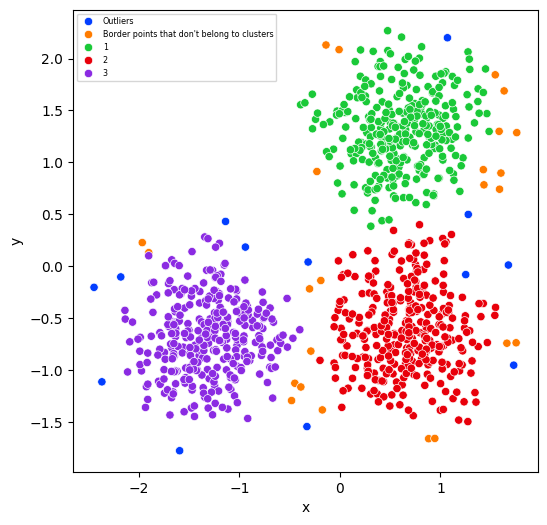

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data = df, x = "x", y = "y", hue = "clusters", palette = "bright")
plt.legend(fontsize='xx-small')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
import time
ourTimes = []
sklearnTimes = []
centers = [[1, 1], [-1, -1], [1, -1]]
for i in range(10):
    X, labels_true = make_blobs(
        n_samples=200 * (i + 1), centers=centers, cluster_std=0.4, random_state=0
    )
    X = StandardScaler().fit_transform(X)
    start = time.time()
    db = DBSCAN(eps=0.3, min_samples=5).fit(X)
    end = time.time()
    sklearnTimes.append(end - start)
    start = time.time()
    points = DBscan(X, 0.3, 5)
    end = time.time()
    ourTimes.append(end-start)

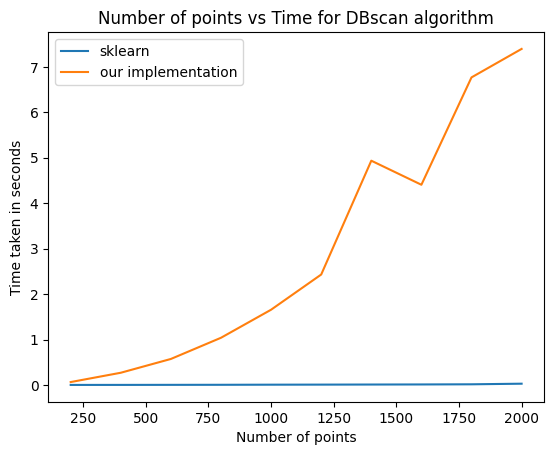

In [ ]:
#We note a quadratic relationship between number of points and time taken
xaxis = [200 * (i+1) for i in range(10)]
plt.plot(xaxis, sklearnTimes)
plt.plot(xaxis, ourTimes)
plt.title('Number of points vs Time for DBscan algorithm')
plt.xlabel('Number of points')
plt.ylabel('Time taken in seconds')
plt.legend(['sklearn', 'our implementation'])
plt.show()